In [ ]:
!pip install rdkit

In [66]:
import os
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem import Draw
from rdkit import DataStructs


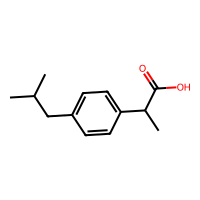

In [50]:
# Query mol
query_smiles='CC(C)CC1=CC=C(C=C1)C(C)C(=O)O' #ibuprofen
query_mol=Chem.MolFromSmiles(query_smiles)
Draw.MolsToImage([query_mol])

In [51]:
#Dataset mols
path='sim_dataset.sdf'
dataset_mols=Chem.SDMolSupplier(path)
dataset_mols=[mol for mol in dataset_mols if mol]
print(len(dataset_mols))

50


In [77]:
#Generate FPs
fps_gen=AllChem.GetRDKitFPGenerator()
#GetRDKitGenerator()

#Query mol FPs
query_fp=fps_gen.GetFingerprint(query_mol)

#Dataset mols FPs
dataset_fps=fps_gen.GetFingerprints(dataset_mols)
print(dataset_fps)


(<rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x78390acc1e70>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x78390ad61af0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x78390ad63060>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x783909e00e40>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x783909e00dd0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x783909e00d60>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x783909e00eb0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x783909e00f20>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x783909e00f90>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x783909e01000>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x783909e01070>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x783909e010e0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x783909e01150>, <rdkit.DataStructs.cData

In [75]:
#Similarity computation
sim_threshold=0.7

matched_mols_dict={}
matched_mols_list=[]
for index,fp in enumerate(dataset_fps):
  sim=DataStructs.TanimotoSimilarity(fp, query_fp)
  if sim >= sim_threshold:
    print(f'Similarity: {sim}')
    #dataset_mols -> to get molecules
    mol=dataset_mols[index]
    matched_mols_dict[mol]=sim
    matched_mols_list.append(mol)

print(matched_mols_dict)
print(f"Number of key-value pair in matched molecule dictionary = {len(matched_mols_dict)}")



Similarity: 0.8475836431226765
Similarity: 0.75
Similarity: 0.75
{<rdkit.Chem.rdchem.Mol object at 0x78390acc0120>: 0.8475836431226765, <rdkit.Chem.rdchem.Mol object at 0x78390acc0190>: 0.75, <rdkit.Chem.rdchem.Mol object at 0x78390acc0200>: 0.75}
Number of key-value pair in matched molecule dictionary = 3
[dict_keys([<rdkit.Chem.rdchem.Mol object at 0x78390acc0120>, <rdkit.Chem.rdchem.Mol object at 0x78390acc0190>, <rdkit.Chem.rdchem.Mol object at 0x78390acc0200>]), dict_keys([<rdkit.Chem.rdchem.Mol object at 0x78390acc0120>, <rdkit.Chem.rdchem.Mol object at 0x78390acc0190>, <rdkit.Chem.rdchem.Mol object at 0x78390acc0200>]), dict_keys([<rdkit.Chem.rdchem.Mol object at 0x78390acc0120>, <rdkit.Chem.rdchem.Mol object at 0x78390acc0190>, <rdkit.Chem.rdchem.Mol object at 0x78390acc0200>])]


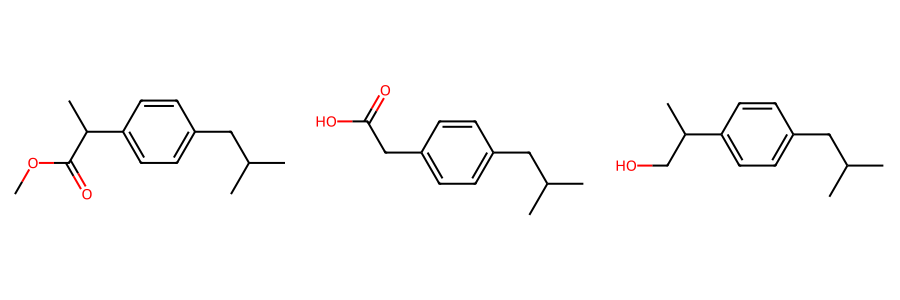

In [76]:
#Draw mols
mols_img=Draw.MolsToGridImage(matched_mols_list, subImgSize=(300,300), returnPNG=False)
Draw.MolsToGridImage(matched_mols_list, subImgSize=(300,300), returnPNG=False)

In [73]:
mols_img.save('sim_to_ibuprofene.png')
#export as sdf
sdf_writer=Chem.SDWriter('sim_to_ibuprofene.sdf')
for mol in matched_mols_list:
  sdf_writer.write(mol)
sdf_writer.flush() #Exported✅